In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import sys
import datetime as datetime
from datetime import datetime as dt
from datetime import timedelta as td
from datetime import date as dater

states = pd.read_csv(r'C:/Users/enoch/Desktop/MLvsCOVID/Jupyter Notebooks/allstates.csv')
states["date"]= pd.to_datetime(states["date"]) 
states['date'] = states['date'].dt.date
states=states.set_index(['state','date'])
states=states.sort_index()
states

def addnewcolumn():
    relevantdate = states.index.tolist() 
    bchanges =[]

    for date in relevantdate:
        today=(states.loc[date[0]].loc[date[1]].newcases)
 #       if(today<1):
#            bchanges.append(0.1)
#        
        bchanges.append(today)
    

   
    #print(bchanges) 
    states['divnewcases']=bchanges
addnewcolumn()



Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,7) [intercept=True]; AIC=1888.338, BIC=1903.256, Time=0.316 seconds
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=True]; AIC=1981.399, BIC=1987.366, Time=0.011 seconds
Fit ARIMA(1,1,0)x(1,1,0,7) [intercept=True]; AIC=1942.068, BIC=1954.003, Time=0.131 seconds
Fit ARIMA(0,1,1)x(0,1,1,7) [intercept=True]; AIC=1886.635, BIC=1898.569, Time=0.255 seconds
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=False]; AIC=1979.408, BIC=1982.391, Time=0.012 seconds
Fit ARIMA(0,1,1)x(0,1,0,7) [intercept=True]; AIC=1904.428, BIC=1913.379, Time=0.120 seconds
Fit ARIMA(0,1,1)x(1,1,1,7) [intercept=True]; AIC=1882.626, BIC=1897.544, Time=0.432 seconds
Fit ARIMA(0,1,1)x(1,1,0,7) [intercept=True]; AIC=1897.887, BIC=1909.821, Time=0.231 seconds
Fit ARIMA(0,1,1)x(2,1,1,7) [intercept=True]; AIC=1883.213, BIC=1901.115, Time=0.888 seconds
Fit ARIMA(0,1,1)x(1,1,2,7) [intercept=True]; AIC=1882.931, BIC=1900.833, Time=0.659 seconds
Fit ARIMA(0,1,1)x(0,1,2,7) [intercep

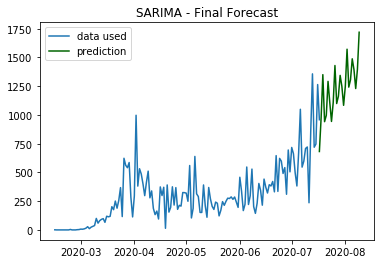

In [9]:
cali=states.loc['Washington']
df=cali['divnewcases']

smodel = pm.auto_arima(df, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=7,
                       start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

print(smodel.summary())


n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df.index[-1], periods = n_periods, freq='D')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.iloc[:],label="data used")
#plt.plot(actual['new_confirmed_cases'].iloc[:14],label="actual")
plt.plot(fitted_series, color='darkgreen',label="prediction")

plt.legend()
plt.title("SARIMA - Final Forecast")
plt.show()
